#### Aim: of this notebook is to get a timestamp-scan mapping AND AMCL pose prediction for ROS

In [1]:
import rosbag
import matplotlib.pyplot as plt

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
import sensor_msgs.point_cloud2 as pc2
import rospy
from sensor_msgs.msg import PointCloud2, LaserScan
import math
import rosbag
import matplotlib.pyplot as plt
import pickle

In [3]:
import open3d as o3d
import numpy as np
import copy

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
EXP_NAME = "exp_1"

In [5]:
bag_file_name = "/home/anmolagarwal/Desktop/bag_by_parth.bag"

## Look at what sort of pose information is present

In [6]:
bag = rosbag.Bag(bag_file_name)
all_timestamps = []
amcl_poses = []
for topic, msg, t in bag.read_messages(topics=['/amcl_pose']):
    #print(msg)
    #print(msg.header.stamp)
    all_timestamps.append(msg.header.stamp)
    amcl_poses.append(   [msg.header.stamp, msg.pose.pose     ])
    #print("###########################")
    #break
bag.close()

In [7]:
len(all_timestamps), all_timestamps

(389,
 [genpy.Time[1668427299336005313],
  genpy.Time[1668427404401142699],
  genpy.Time[1668427404936613051],
  genpy.Time[1668427405242593256],
  genpy.Time[1668427405546692474],
  genpy.Time[1668427405850379285],
  genpy.Time[1668427406157490682],
  genpy.Time[1668427406461677813],
  genpy.Time[1668427406769718524],
  genpy.Time[1668427407072582032],
  genpy.Time[1668427407379583946],
  genpy.Time[1668427407686548611],
  genpy.Time[1668427407990879785],
  genpy.Time[1668427408297853500],
  genpy.Time[1668427408601661600],
  genpy.Time[1668427408907232901],
  genpy.Time[1668427409212910895],
  genpy.Time[1668427409516613301],
  genpy.Time[1668427409823706476],
  genpy.Time[1668427410131207999],
  genpy.Time[1668427410431742275],
  genpy.Time[1668427410738819500],
  genpy.Time[1668427411045717928],
  genpy.Time[1668427411349858741],
  genpy.Time[1668427411653678596],
  genpy.Time[1668427412038996560],
  genpy.Time[1668427412420078218],
  genpy.Time[1668427412801996571],
  genpy.Time[1

In [8]:
amcl_poses[0]

[genpy.Time[1668427299336005313],
 position: 
   x: -0.08165548836699942
   y: 0.13097753673226195
   z: 0.0
 orientation: 
   x: 0.0
   y: 0.0
   z: 0.047900890071523504
   w: 0.9988520935205352]

In [9]:
amcl_poses_df = []

In [10]:
with open(EXP_NAME+"/"+"amcl_poses.tum", 'w') as fd:
    for curr_elem in amcl_poses:
        ts = curr_elem[0].secs + curr_elem[0].nsecs*(10**(-9))
        x = curr_elem[1].position.x
        y = curr_elem[1].position.y
        z = curr_elem[1].position.z
        q_x = curr_elem[1].orientation.x
        q_y = curr_elem[1].orientation.y
        q_z = curr_elem[1].orientation.z
        q_w = curr_elem[1].orientation.w
        str_to_write = f"{ts} {x} {y} {z} {q_x} {q_y} {q_z} {q_w}"
        fd.write(str_to_write+"\n")
        
        curr_obj = dict()
        curr_obj['ts'] = ts
        curr_obj['x'] = x
        curr_obj['y'] = y
        curr_obj['z'] = z
        curr_obj['q_x'] = q_x
        curr_obj['q_y'] = q_y
        curr_obj['q_z'] = q_z
        curr_obj['q_w'] = q_w
        amcl_poses_df.append(curr_obj)
        #break

In [11]:
len(amcl_poses_df)

389

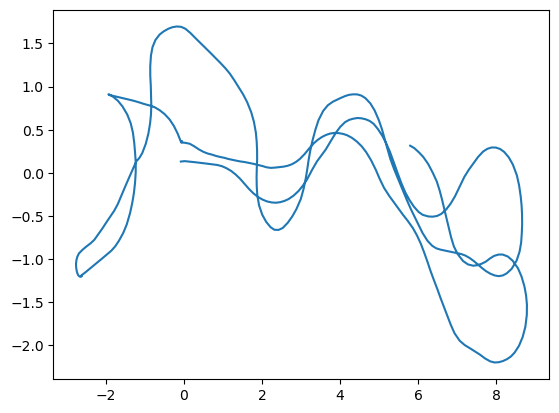

In [12]:
x_arr = [x['x'] for x in amcl_poses_df]
y_arr = [x['y'] for x in amcl_poses_df]

plt.plot(x_arr, y_arr)

## ----------------------------

In [13]:
def fetch_pcl_from_laser_scan(curr_laser_scan):
    pass
    

#### Read all the scans from the database and tag them

In [14]:
def simplify_pt(curr_pt):
    ans = dict()
    ans['x'] = curr_pt.x
    ans['y'] = curr_pt.y
    ans['z'] = curr_pt.z
    ans['intensity'] = curr_pt.intensity
    ans['index'] = curr_pt.index
    return ans

In [15]:
import json

In [16]:
import json
with open("exp_1/traj_df.json",'r') as fd:
    traj_df = json.load(fd)

In [17]:
len(traj_df)

2625

#### Create point clouds for all points in the database

In [18]:
traj_df[0]

{'ts': 1668427399.129318,
 'point_list': [{'x': 2.916569709777832,
   'y': 0.5917754173278809,
   'z': 0.0,
   'intensity': 47.0,
   'index': 0},
  {'x': 2.9185612201690674,
   'y': 0.6019973158836365,
   'z': 0.0,
   'intensity': 47.0,
   'index': 1},
  {'x': 2.9205172061920166,
   'y': 0.6122381687164307,
   'z': 0.0,
   'intensity': 47.0,
   'index': 2},
  {'x': 2.918525218963623,
   'y': 0.6216646432876587,
   'z': 0.0,
   'intensity': 47.0,
   'index': 3},
  {'x': 2.9243218898773193,
   'y': 0.6327766180038452,
   'z': 0.0,
   'intensity': 47.0,
   'index': 4},
  {'x': 2.9222636222839355,
   'y': 0.6422152519226074,
   'z': 0.0,
   'intensity': 47.0,
   'index': 5},
  {'x': 2.9240787029266357,
   'y': 0.6525183916091919,
   'z': 0.0,
   'intensity': 47.0,
   'index': 6},
  {'x': 2.9219565391540527,
   'y': 0.6619561314582825,
   'z': 0.0,
   'intensity': 47.0,
   'index': 7},
  {'x': 2.919804096221924,
   'y': 0.6713869571685791,
   'z': 0.0,
   'intensity': 47.0,
   'index': 8},


In [19]:
def fetch_pcd_obj(pcd_json):
    pts_arr = []
    master_pcd=o3d.geometry.PointCloud()
    for curr_elem in pcd_json:
        pts_arr.append([curr_elem['x'],curr_elem['y'], curr_elem['z'] ])
    master_pcd.points = o3d.utility.Vector3dVector(np.asarray(pts_arr))
    return master_pcd

In [20]:
query_pcd = fetch_pcd_obj(traj_df[0]['point_list'])

In [21]:
query_pcd

PointCloud with 895 points.

In [22]:
o3d.visualization.draw_geometries([query_pcd])

In [23]:
sorted([len(x['point_list']) for x in traj_df])[::-1]

[905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 905,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903

#### Load a query scan

In [24]:
query_pcd

PointCloud with 895 points.

In [25]:
#o3d.visualization.draw_geometries([query_pcd])

#### Loading all candidates

In [26]:
!ls

chcking_db.ipynb  icp_checker.ipynb	ScreenCamera_2022-11-15-09-53-49.json
exp_1		  points_df.json	ScreenCapture_2022-11-15-09-53-49.png
find_best.ipynb   read_bag_files.ipynb


In [27]:
query_pcd.estimate_normals()

In [28]:
with open("points_df.json",'r') as fd:
    points_df = json.load(fd)

In [29]:
points_df[0]

{'y': -4.0,
 'x': -6.5,
 'point_list': [{'y': 1.3367425203323364,
   'x': 2.804208278656006,
   'intensity': 0.0,
   'z': 0.0,
   'index': 64},
  {'y': 1.340467929840088,
   'x': 2.762428045272827,
   'intensity': 0.0,
   'z': 0.0,
   'index': 65},
  {'y': 1.3800746202468872,
   'x': 2.794430732727051,
   'intensity': 0.0,
   'z': 0.0,
   'index': 66},
  {'y': 1.3987925052642822,
   'x': 2.783435583114624,
   'intensity': 0.0,
   'z': 0.0,
   'index': 67},
  {'y': 1.4210658073425293,
   'x': 2.779438018798828,
   'intensity': 0.0,
   'z': 0.0,
   'index': 68},
  {'y': 1.4520612955093384,
   'x': 2.792012929916382,
   'intensity': 0.0,
   'z': 0.0,
   'index': 69},
  {'y': 1.468180537223816,
   'x': 2.7757065296173096,
   'intensity': 0.0,
   'z': 0.0,
   'index': 70},
  {'y': 1.489068865776062,
   'x': 2.7684686183929443,
   'intensity': 0.0,
   'z': 0.0,
   'index': 71},
  {'y': 1.5170036554336548,
   'x': 2.7740137577056885,
   'intensity': 0.0,
   'z': 0.0,
   'index': 72},
  {'y': 

In [30]:
points_df = list(filter(lambda x:len(x['point_list'])>0, points_df))

In [31]:
print("len is ", len(points_df))
for idx, curr_elem in enumerate(points_df):
    print(idx)
    curr_elem['pcd_obj'] = fetch_pcd_obj(curr_elem['point_list'])

len is  17899
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259


3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122


5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179


7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191


9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
1

11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
1196

13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
1357

15302
15303
15304
15305
15306
15307
15308
15309
15310
15311
15312
15313
15314
15315
15316
15317
15318
15319
15320
15321
15322
15323
15324
15325
15326
15327
15328
15329
15330
15331
15332
15333
15334
15335
15336
15337
15338
15339
15340
15341
15342
15343
15344
15345
15346
15347
15348
15349
15350
15351
15352
15353
15354
15355
15356
15357
15358
15359
15360
15361
15362
15363
15364
15365
15366
15367
15368
15369
15370
15371
15372
15373
15374
15375
15376
15377
15378
15379
15380
15381
15382
15383
15384
15385
15386
15387
15388
15389
15390
15391
15392
15393
15394
15395
15396
15397
15398
15399
15400
15401
15402
15403
15404
15405
15406
15407
15408
15409
15410
15411
15412
15413
15414
15415
15416
15417
15418
15419
15420
15421
15422
15423
15424
15425
15426
15427
15428
15429
15430
15431
15432
15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15443
15444
15445
15446
15447
15448
15449
15450
15451
15452
15453
15454
15455
15456
15457
15458
15459
15460
15461
15462
15463
15464
15465
15466
15467
1546

17263
17264
17265
17266
17267
17268
17269
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
1742

In [32]:
def fetch_icp_res(source, target, threshold=0.1):
    trans_init = np.asarray([[1, 0, 0, 0],
                             [0,1, 0,0],
                             [0, 0,1, 0], 
                             [0.0, 0.0, 0.0, 1.0]])
    reg_p2l = o3d.pipelines.registration.registration_icp(
    source, target, threshold, trans_init,
    o3d.pipelines.registration.TransformationEstimationPointToPoint())
    return reg_p2l

### Find scores

In [33]:
scores_arr = []
for idx, curr_elem in enumerate(points_df):
    print(idx)
    curr_elem['pcd_obj'] = fetch_pcd_obj(curr_elem['point_list'])  
    curr_elem['pcd_obj'].estimate_normals()
    curr_elem['idx'] = idx
    #reg_p2l = fetch_icp_res(query_pcd, curr_elem['pcd_obj'])
    reg_p2l = fetch_icp_res(curr_elem['pcd_obj'], query_pcd)
    scores_arr.append([idx, reg_p2l])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070


3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715


5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357


6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037


8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680


10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
1030

11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
1170

12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
1307

14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
1446

15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
1584

17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
17182
17183
17184
17185
17186
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
1721

In [34]:
query_pcd

PointCloud with 895 points.

In [35]:
curr_elem['pcd_obj']

PointCloud with 4 points.

In [36]:
scores_arr = sorted(scores_arr, key=lambda x:-np.asarray(x[1].correspondence_set).shape[0])

In [37]:
scores_arr

[[8373,
  RegistrationResult with fitness=8.049209e-01, inlier_rmse=3.808935e-02, and correspondence_set size of 458
  Access transformation to get result.],
 [14626,
  RegistrationResult with fitness=8.707627e-01, inlier_rmse=4.811477e-02, and correspondence_set size of 411
  Access transformation to get result.],
 [12963,
  RegistrationResult with fitness=5.006289e-01, inlier_rmse=4.700318e-02, and correspondence_set size of 398
  Access transformation to get result.],
 [8094,
  RegistrationResult with fitness=4.361335e-01, inlier_rmse=4.534442e-02, and correspondence_set size of 379
  Access transformation to get result.],
 [14258,
  RegistrationResult with fitness=9.168704e-01, inlier_rmse=3.007109e-02, and correspondence_set size of 375
  Access transformation to get result.],
 [8290,
  RegistrationResult with fitness=5.808696e-01, inlier_rmse=4.343376e-02, and correspondence_set size of 334
  Access transformation to get result.],
 [8452,
  RegistrationResult with fitness=5.76856

In [38]:
np.asarray(scores_arr[22][1].correspondence_set).shape[0]

271

In [39]:
len(points_df[13424]['point_list'])

82

In [40]:
sorted([len(x['point_list']) for x in points_df])[::-1]

[904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 904,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 903,
 902,
 902,
 902,
 902,
 902,
 902,
 902,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 900,
 900,
 900,
 900,
 900,
 900,
 900,
 900,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 899

In [41]:
for i in scores_arr:
    x, y = points_df[i[0]]['x'], points_df[i[0]]['y']
    print(x, y)

3.299999999999965 -1.2999999999999976
10.999999999999936 -3.2999999999999994
8.899999999999945 2.300000000000006
2.8999999999999666 1.8000000000000052
10.49999999999994 -3.8
3.1999999999999655 -1.3999999999999977
3.399999999999965 -1.3999999999999977
11.199999999999939 -2.899999999999999
10.49999999999994 -2.999999999999999
3.399999999999965 -1.4999999999999978
-1.700000000000017 3.800000000000007
5.499999999999957 -2.4999999999999987
0.6999999999999744 -3.1999999999999993
1.7999999999999705 -1.4999999999999978
3.4999999999999645 -1.2999999999999976
2.799999999999967 1.2000000000000046
2.9999999999999662 -1.3999999999999977
11.099999999999937 -1.2999999999999976
-0.600000000000021 3.9000000000000075
9.79999999999994 -1.699999999999998
6.999999999999952 -1.9999999999999982
-3.8000000000000096 -2.5999999999999988
-3.5000000000000107 1.100000000000005
3.6999999999999638 1.9000000000000057
6.899999999999952 -1.8999999999999981
1.8999999999999702 -1.4999999999999978
-0.5000000000000213 2.90

In [42]:
points_df[0]

{'y': -4.0,
 'x': -6.5,
 'point_list': [{'y': 1.3367425203323364,
   'x': 2.804208278656006,
   'intensity': 0.0,
   'z': 0.0,
   'index': 64},
  {'y': 1.340467929840088,
   'x': 2.762428045272827,
   'intensity': 0.0,
   'z': 0.0,
   'index': 65},
  {'y': 1.3800746202468872,
   'x': 2.794430732727051,
   'intensity': 0.0,
   'z': 0.0,
   'index': 66},
  {'y': 1.3987925052642822,
   'x': 2.783435583114624,
   'intensity': 0.0,
   'z': 0.0,
   'index': 67},
  {'y': 1.4210658073425293,
   'x': 2.779438018798828,
   'intensity': 0.0,
   'z': 0.0,
   'index': 68},
  {'y': 1.4520612955093384,
   'x': 2.792012929916382,
   'intensity': 0.0,
   'z': 0.0,
   'index': 69},
  {'y': 1.468180537223816,
   'x': 2.7757065296173096,
   'intensity': 0.0,
   'z': 0.0,
   'index': 70},
  {'y': 1.489068865776062,
   'x': 2.7684686183929443,
   'intensity': 0.0,
   'z': 0.0,
   'index': 71},
  {'y': 1.5170036554336548,
   'x': 2.7740137577056885,
   'intensity': 0.0,
   'z': 0.0,
   'index': 72},
  {'y': 

In [43]:
query_pcd.paint_uniform_color((1, 0, 0))

PointCloud with 895 points.

In [44]:
o3d.visualization.draw_geometries([query_pcd, points_df[3987]['pcd_obj']])

In [45]:
points_df[3987]

{'y': 2.600000000000006,
 'x': -2.2000000000000153,
 'point_list': [{'y': 0.0,
   'x': 0.12919387221336365,
   'intensity': 0.0,
   'z': 0.0,
   'index': 0},
  {'y': 0.0009024430764839053,
   'x': 0.1298377811908722,
   'intensity': 0.0,
   'z': 0.0,
   'index': 1},
  {'y': 0.001668049837462604,
   'x': 0.11998840421438217,
   'intensity': 0.0,
   'z': 0.0,
   'index': 2},
  {'y': 0.002501973882317543,
   'x': 0.11997391283512115,
   'intensity': 0.0,
   'z': 0.0,
   'index': 3},
  {'y': 0.0033357772044837475,
   'x': 0.11995362490415573,
   'intensity': 0.0,
   'z': 0.0,
   'index': 4},
  {'y': 0.0046981628984212875,
   'x': 0.13513611257076263,
   'intensity': 0.0,
   'z': 0.0,
   'index': 5},
  {'y': 0.0050729108043015,
   'x': 0.12157446146011353,
   'intensity': 0.0,
   'z': 0.0,
   'index': 6},
  {'y': 0.00667678052559495,
   'x': 0.13712430000305176,
   'intensity': 0.0,
   'z': 0.0,
   'index': 7},
  {'y': 0.007198696956038475,
   'x': 0.12933148443698883,
   'intensity': 0.0,
